<a href="https://colab.research.google.com/github/ChetanJadhav2341/Global-Terrorism-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [20]:
terrorist_data=pd.read_csv('/content/drive/MyDrive/Project-EDA/Global Terrorism Analysis/Global Terrorism Data.csv',encoding="ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [21]:
# given data set
terrorist_data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


In [22]:
# finding data set information
terrorist_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [23]:
# finding summary of data set
terrorist_data.describe(include='all')

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
count,1.816910e+05,181691.000000,181691.000000,181691.000000,9239,181691.000000,2220,181691.000000,181691,181691.000000,...,28289,115500,76933,43516,181691,181691.000000,181691.000000,181691.000000,181691.000000,25038
unique,NaN,NaN,NaN,NaN,2244,NaN,1859,NaN,205,NaN,...,15429,83988,62263,36090,26,NaN,NaN,NaN,NaN,14306
top,NaN,NaN,NaN,NaN,"September 18-24, 2016",NaN,8/4/1998,NaN,Iraq,NaN,...,Casualty numbers for this incident conflict ac...,Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...","Christopher Hewitt, ""Political Violence and Te...",START Primary Collection,NaN,NaN,NaN,NaN,"201612010023, 201612010024, 201612010025, 2016..."
freq,NaN,NaN,NaN,NaN,101,NaN,18,NaN,24636,NaN,...,1607,205,134,139,78002,NaN,NaN,NaN,NaN,80
mean,2.002705e+11,2002.638997,6.467277,15.505644,NaN,0.045346,NaN,131.968501,NaN,7.160938,...,NaN,NaN,NaN,NaN,NaN,-4.543731,-4.464398,0.090010,-3.945952,NaN
std,1.325957e+09,13.259430,3.388303,8.814045,NaN,0.208063,NaN,112.414535,NaN,2.933408,...,NaN,NaN,NaN,NaN,NaN,4.543547,4.637152,0.568457,4.691325,NaN
min,1.970000e+11,1970.000000,0.000000,0.000000,NaN,0.000000,NaN,4.000000,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,-9.000000,-9.000000,NaN
25%,1.991021e+11,1991.000000,4.000000,8.000000,NaN,0.000000,NaN,78.000000,NaN,5.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,-9.000000,NaN
50%,2.009022e+11,2009.000000,6.000000,15.000000,NaN,0.000000,NaN,98.000000,NaN,6.000000,...,NaN,NaN,NaN,NaN,NaN,-9.000000,-9.000000,0.000000,0.000000,NaN
75%,2.014081e+11,2014.000000,9.000000,23.000000,NaN,0.000000,NaN,160.000000,NaN,10.000000,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,NaN


# **Dropping all columns with NaN values**

In [24]:
# droping all null values in the dataset
terrorist_attack=terrorist_data.dropna(axis=1)

In [25]:
terrorist_attack.head(10)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,...,MANO-D,0,13,Unknown,0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,0,...,23rd of September Communist League,0,13,Unknown,0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,0,...,Unknown,0,13,Unknown,0,PGIS,-9,-9,1,1
3,197001000002,1970,1,0,0,78,Greece,8,Western Europe,0,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,1,1
4,197001000003,1970,1,0,0,101,Japan,4,East Asia,0,...,Unknown,0,8,Incendiary,1,PGIS,-9,-9,1,1
5,197001010002,1970,1,1,0,217,United States,1,North America,0,...,Black Nationalists,0,5,Firearms,1,Hewitt Project,-9,-9,0,-9
6,197001020001,1970,1,2,0,218,Uruguay,3,South America,0,...,Tupamaros (Uruguay),0,5,Firearms,0,PGIS,0,0,0,0
7,197001020002,1970,1,2,0,217,United States,1,North America,0,...,Unknown,0,6,Explosives,1,Hewitt Project,-9,-9,0,-9
8,197001020003,1970,1,2,0,217,United States,1,North America,0,...,New Year's Gang,0,8,Incendiary,1,Hewitt Project,0,0,0,0
9,197001030001,1970,1,3,0,217,United States,1,North America,0,...,New Year's Gang,0,8,Incendiary,1,Hewitt Project,0,0,0,0


In [26]:
terrorist_attack.shape

(181691, 29)

In [27]:
list(terrorist_attack.columns)

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'gname',
 'individual',
 'weaptype1',
 'weaptype1_txt',
 'property',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

# **finding either null values existed or not**

In [28]:
terrorist_attack.isnull()


,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
181687,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
181688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
181689,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# finding null values sum
terrorist_attack.isnull().sum()


eventid            0
iyear              0
imonth             0
iday               0
extended           0
country            0
country_txt        0
region             0
region_txt         0
vicinity           0
crit1              0
crit2              0
crit3              0
success            0
suicide            0
attacktype1        0
attacktype1_txt    0
targtype1          0
targtype1_txt      0
gname              0
individual         0
weaptype1          0
weaptype1_txt      0
property           0
dbsource           0
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
dtype: int64

# **CREATING HEAT MAP**

In [30]:
terrorist_attack.drop("eventid",axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
# finding correlation of data set 
terrorist_attack.corr()

,iyear,imonth,iday,extended,country,region,vicinity,crit1,crit2,crit3,...,suicide,attacktype1,targtype1,individual,weaptype1,property,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
iyear,1.000000,0.000139,0.018254,0.091754,-0.135023,0.401384,0.070659,0.001995,0.026211,-0.016784,...,0.137736,0.074153,0.079082,0.017944,-0.011737,-0.278916,-0.143601,-0.133253,-0.077847,-0.175596
imonth,0.000139,1.000000,0.005497,-0.000468,-0.006305,-0.002999,-0.004501,0.001568,0.001734,0.000176,...,0.003071,0.006705,-0.000948,-0.001661,0.007863,-0.005816,-0.002302,-0.002034,-0.002554,-0.006336
iday,0.018254,0.005497,1.000000,-0.004700,0.003468,0.009710,-0.005367,0.011434,-0.002702,-0.004889,...,0.003593,-0.005333,-0.000052,-0.003788,-0.003019,-0.003903,-0.001540,-0.001621,-0.002027,-0.001199
extended,0.091754,-0.000468,-0.004700,1.000000,-0.020466,0.038389,0.017784,-0.015029,0.001249,0.048533,...,-0.033961,0.272272,0.011613,-0.008929,0.207802,-0.002096,0.071768,0.075147,0.027335,0.080767
country,-0.135023,-0.006305,0.003468,-0.020466,1.000000,0.148597,-0.012291,-0.006646,-0.038480,-0.040288,...,-0.050360,-0.021384,-0.019703,0.027918,-0.023708,0.032051,0.069904,0.067564,0.207281,0.153118
region,0.401384,-0.002999,0.009710,0.038389,0.148597,1.000000,0.073678,0.025521,-0.013163,-0.010175,...,0.112672,0.007642,0.041396,-0.059963,0.013257,-0.183279,-0.082584,-0.071917,0.043139,-0.047900
vicinity,0.070659,-0.004501,-0.005367,0.017784,-0.012291,0.073678,1.000000,0.003330,-0.000534,-0.054995,...,0.008352,0.006504,0.024644,-0.011986,0.001496,-0.019811,0.014487,0.015119,-0.008232,0.010325
crit1,0.001995,0.001568,0.011434,-0.015029,-0.006646,0.025521,0.003330,1.000000,-0.008984,-0.040589,...,0.019039,0.027544,-0.040026,-0.025591,0.029257,-0.007595,0.089973,0.089888,0.015692,0.082288
crit2,0.026211,0.001734,-0.002702,0.001249,-0.038480,-0.013163,-0.000534,-0.008984,1.000000,-0.031425,...,0.002770,0.005157,-0.101522,0.003311,-0.008549,-0.002711,-0.024153,-0.023829,-0.012980,-0.027752
crit3,-0.016784,0.000176,-0.004889,0.048533,-0.040288,-0.010175,-0.054995,-0.040589,-0.031425,1.000000,...,-0.026620,0.028124,0.251296,0.016806,0.018320,0.013345,-0.134557,-0.138251,-0.036112,-0.130216


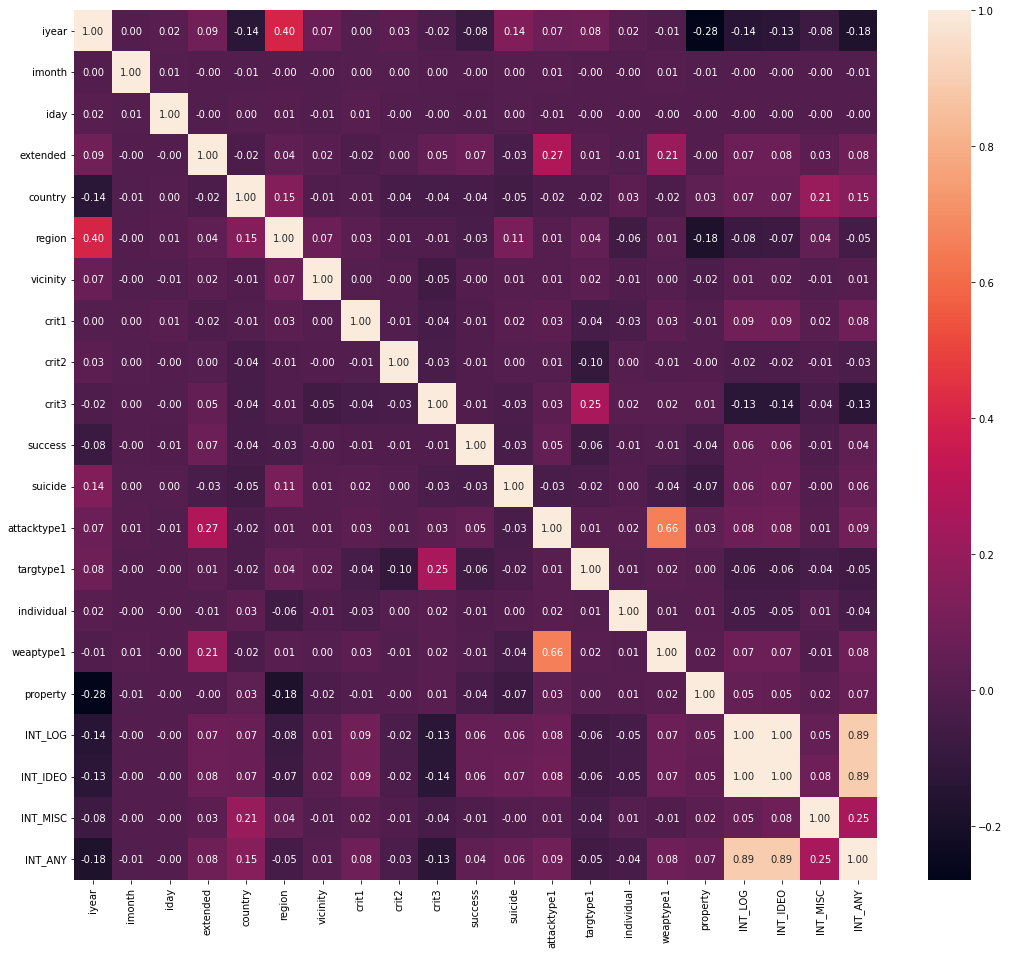

In [33]:
# extrtaction of heat map

plt.figure(figsize=(18,16))
sns.heatmap(terrorist_attack.corr(),fmt='0.2f',annot=True)

From the above heatmap we can conclude that correlationship between anytwo columns ,some part of
data having positive correlation, some part of data having negative correlation , some part of data show Zero Correlation

In [34]:
# finding most frequent terrorist attacked years
terrorist_attack['iyear'].value_counts().reset_index().rename(columns={"index":"year","iyear": "no.of times"})

,year,no.of times
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900
5,2012,8522
6,2011,5076
7,1992,5071
8,2010,4826
9,2008,4805


# **Top 10 frequent terrorist attacked years**

In [35]:
terrorist_attack['iyear'].value_counts().reset_index().rename(columns={"index":"year", "iyear": "no.of times"})[0:10]

,year,no.of times
0,2014,16903
1,2015,14965
2,2016,13587
3,2013,12036
4,2017,10900
5,2012,8522
6,2011,5076
7,1992,5071
8,2010,4826
9,2008,4805


From the above data we can conclude that most frequent terrorist attacked year was 2014, it was
nearly 16,903 times attacked, after second placed was 2015, it was 14965 no.of times attacked

In [36]:
# finding lowest last 10 terrorist attacked years


terrorist_attack['iyear'].value_counts().tail(10).reset_index().rename(columns={"index":"year", "iyear": "no.of times"})[0:10]

,year,no.of times
0,2003,1278
1,2004,1166
2,1998,934
3,1976,923
4,1975,740
5,1970,651
6,1974,581
7,1972,568
8,1973,473
9,1971,471


From the above data we can conclude that lowest attacked year was 1971 ,
In this year only 471 times attacked

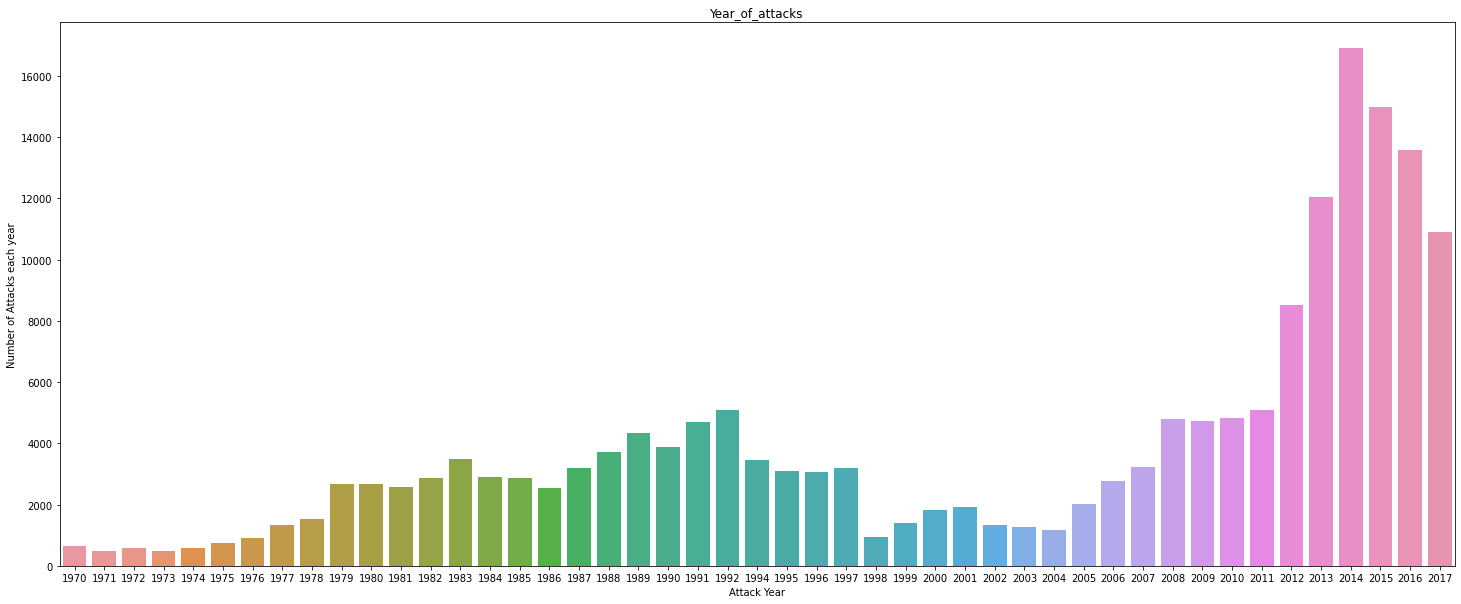

In [37]:
# showing visuvalization related to years


x_year = terrorist_attack['iyear'].unique()
y_count_years = terrorist_attack['iyear'].value_counts().sort_index()
plt.figure(figsize = (25,10))
sns.barplot(x = x_year,y = y_count_years)
plt.title('Year_of_attacks')
plt.xlabel('Attack Year')
plt.ylabel('Number of Attacks each year')
plt.show()

From above bardiagram we can visuvalize that most frequently attacked in 2014

In [38]:
# finding most frequent terrorist attacked countries
# extraction data of country 
terrorist_attack['country_txt'].value_counts().sort_index()


Afghanistan    12731
Albania           80
Algeria         2743
Andorra            1
Angola           499
               ...  
Yemen           3347
Yugoslavia       203
Zaire             50
Zambia            62
Zimbabwe         101
Name: country_txt, Length: 205, dtype: int64

In [39]:
terrorist_attack['country_txt'].value_counts().reset_index().rename(columns={"index":"country","country_txt":"number of attackes"})[0:10]

,country,number of attackes
0,Iraq,24636
1,Pakistan,14368
2,Afghanistan,12731
3,India,11960
4,Colombia,8306
5,Philippines,6908
6,Peru,6096
7,El Salvador,5320
8,United Kingdom,5235
9,Turkey,4292


**From above data we can conclude that most terrorist attacked country is " IRAQ"** **after that second**
**place is Pakistan**

In [40]:
# finding least frequent terrorist attacked country 
terrorist_attack['country_txt'].value_counts().tail(10).reset_index().rename(columns={"index":"country","country_txt":"number of attackes"})[0:10]

,country,number of attackes
0,Vatican City,1
1,Falkland Islands,1
2,St. Lucia,1
3,North Korea,1
4,New Hebrides,1
5,International,1
6,Wallis and Futuna,1
7,South Vietnam,1
8,Andorra,1
9,Antigua and Barbuda,1


From the above data we can conclude that lowest 10 terrorist attacked countries, lowest terrorist
attacked countries are

Vatican City

South Vietnam

International

New Hebrides

Falkland Islands

Andorra

St. Lucia

Antigua and Barbuda

North Korea

Wallis and Futuna


Text(0, 0.5, 'No of attacks')

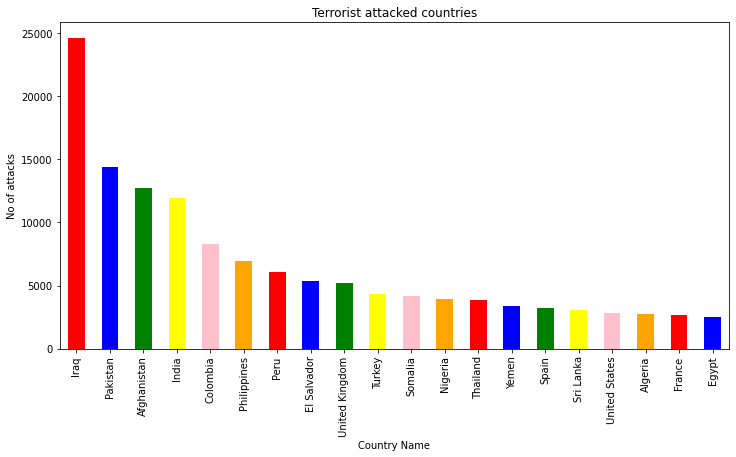

In [41]:
# the bar graph showing top 20 terrist attacked countries

plt.figure(figsize=(12,6))
terrorist_attack['country_txt'].value_counts()[0:20].plot(kind='bar',color=["red","blue","green","yellow","pink","orange"])
plt.title("Terrorist attacked countries")
plt.xlabel("Country Name")
plt.ylabel("No of attacks")

from the above bar diagram we can concolude that "IRAQ" is first place in top 20 most terrorist
attacked country its number of attacks from 1970 to 2017 was 24636 ;,lowest is "Egypt"
, its attacks was
2479

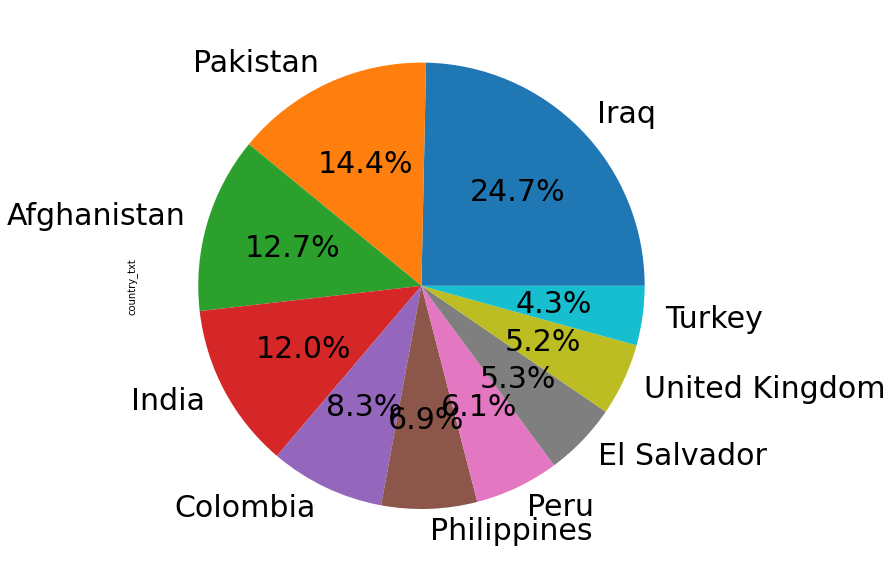

In [43]:
# finding most terrorist attacking countries through pie
plt.figure(figsize=(10,12))
terrorist_attack['country_txt'].value_counts()[0:10].plot(kind='pie',autopct='%1.1f%%',textprops={'fontsize':30})

from the above pie chart we can conclude that "IRAQ" top 10 most terrorist attacked country its total
percantage is 24.7% when compared to all other countries ,in top 10 lowest terrist attacked country is
"Turkey" its percentage is 4.3%

In [44]:
# finding india existed in terrorist attacked list or not
terrorist_attack['country_txt']=='India'

0         False
1         False
2         False
3         False
4         False
          ...  
181686    False
181687    False
181688    False
181689     True
181690    False
Name: country_txt, Length: 181691, dtype: bool

In [45]:
# india
India=terrorist_attack[terrorist_attack['country_txt']=='India']
India.head(10)

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,crit1,...,gname,individual,weaptype1,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
1186,1972,2,22,0,92,India,6,South Asia,0,1,...,Palestinians,0,6,Explosives,0,Hijacking DB,1,1,1,1
2764,1975,1,2,0,92,India,6,South Asia,0,1,...,Ananda Marga,0,6,Explosives,0,UMD Encyclopedia of World Terrorism 2012,0,0,0,0
3857,1976,5,26,0,92,India,6,South Asia,0,1,...,Unknown,0,6,Explosives,1,PGIS,-9,-9,0,-9
5327,1977,9,28,0,92,India,6,South Asia,0,1,...,Japanese Red Army (JRA),0,5,Firearms,0,Hijacking DB,1,1,1,1
7337,1979,1,13,0,92,India,6,South Asia,0,1,...,Naga People,0,5,Firearms,1,PGIS,0,0,0,0
7342,1979,1,14,0,92,India,6,South Asia,0,1,...,Unknown,0,5,Firearms,0,PGIS,-9,-9,0,-9
8174,1979,4,26,0,92,India,6,South Asia,0,1,...,Meitei extremists,0,5,Firearms,1,PGIS,0,0,0,0
8685,1979,6,14,0,92,India,6,South Asia,0,1,...,Mizo National Front,0,5,Firearms,0,PGIS,0,0,0,0
8831,1979,7,1,0,92,India,6,South Asia,0,1,...,Mizo National Front,0,5,Firearms,1,PGIS,0,0,0,0
8836,1979,7,2,0,92,India,6,South Asia,0,1,...,Mizo National Front,0,13,Unknown,1,PGIS,0,0,0,0


**from the above data we can conclude that "INDIA" also had been attacked by terrorist since 1972**

In [46]:
# filling null values of nkill and nwound with zero and unknowncity with unknown

terrorist_data["nkill"]= terrorist_data["nkill"].fillna(0)
terrorist_data["nwound"]= terrorist_data["nwound"].fillna(0)
terrorist_data["city"]=terrorist_data['city'].fillna('unknown')

In [47]:
# creating columns for city and nkill and nwounds

terrorist_attack['city']=terrorist_data['city']
terrorist_attack["nkill"]=terrorist_data["nkill"]
terrorist_attack["nwound"]=terrorist_data['nwound']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [48]:

terrorist_attack

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,crit1,...,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,city,nkill,nwound
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,1,...,Unknown,0,PGIS,0,0,0,0,Santo Domingo,1.0,0.0
1,1970,0,0,0,130,Mexico,1,North America,0,1,...,Unknown,0,PGIS,0,1,1,1,Mexico city,0.0,0.0
2,1970,1,0,0,160,Philippines,5,Southeast Asia,0,1,...,Unknown,0,PGIS,-9,-9,1,1,Unknown,1.0,0.0
3,1970,1,0,0,78,Greece,8,Western Europe,0,1,...,Explosives,1,PGIS,-9,-9,1,1,Athens,0.0,0.0
4,1970,1,0,0,101,Japan,4,East Asia,0,1,...,Incendiary,1,PGIS,-9,-9,1,1,Fukouka,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,2017,12,31,0,182,Somalia,11,Sub-Saharan Africa,0,1,...,Firearms,-9,START Primary Collection,0,0,0,0,Ceelka Geelow,1.0,2.0
181687,2017,12,31,0,200,Syria,10,Middle East & North Africa,1,1,...,Explosives,1,START Primary Collection,-9,-9,1,1,Jableh,2.0,7.0
181688,2017,12,31,0,160,Philippines,5,Southeast Asia,0,1,...,Incendiary,1,START Primary Collection,0,0,0,0,Kubentog,0.0,0.0
181689,2017,12,31,0,92,India,6,South Asia,0,1,...,Explosives,-9,START Primary Collection,-9,-9,0,-9,Imphal,0.0,0.0


In [49]:

# finding number of killed persons in regionwise
region_wise_killed=terrorist_attack[["region_txt","nkill"]].groupby("region_txt").sum().sort_values(by="nkill",ascending= False)
region_wise_killed


,nkill
region_txt,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [50]:
# finding regionwise wounded people
region_wise_wounded=terrorist_attack[["region_txt","nwound"]].groupby("region_txt").sum().sort_values(by="nwound",ascending= False)
region_wise_wounded

,nwound
region_txt,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


Text(0, 0.5, 'nwound')

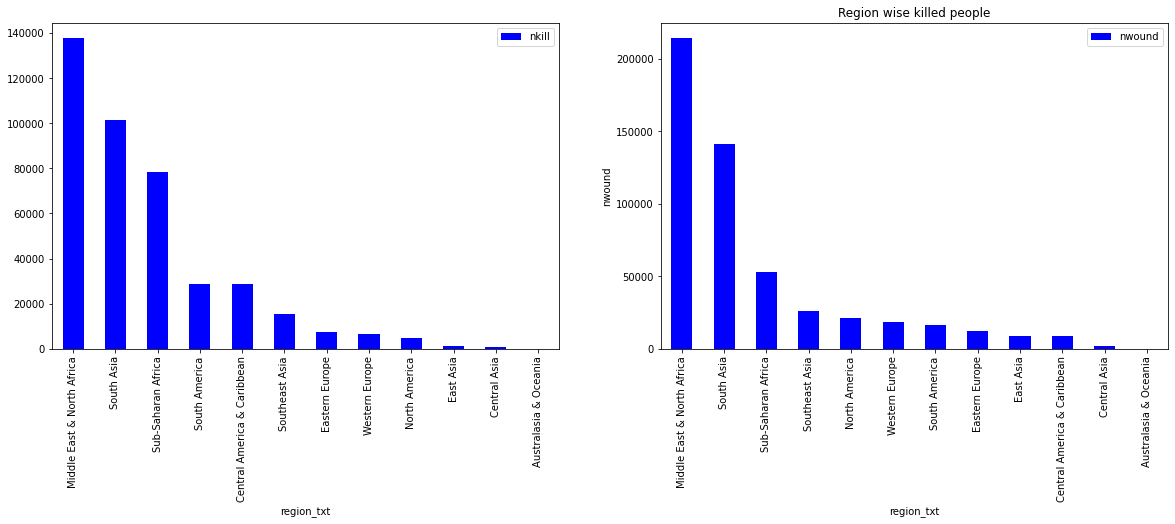

In [51]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#killed

region_wise_killed.plot(kind="bar", color="blue",figsize=(20,6),ax=ax0)
plt.title("Region wise killed people")
plt.xlabel("region_txt")
plt.ylabel("nkill")

#wounded

region_wise_wounded.plot(kind="bar", color="blue",figsize=(20,6),ax=ax1)
plt.title("Region wise killed people")
plt.xlabel("region_txt")
plt.ylabel("nwound")

From the above data we can conclude that most people killed in Middle East & North Africa its number
was 1,37,642 AND most people wounded in Middle East & North Africa its number was 214308

In [52]:

# finding in which year most people killed
region_wise_kill=terrorist_attack[["iyear","nkill"]].groupby("iyear").sum().sort_values(by="nkill",ascending= False)
region_wise_kill


,nkill
iyear,
2014,44490.0
2015,38853.0
2016,34871.0
2017,26445.0
2013,22273.0
2012,15497.0
2007,12824.0
1997,10924.0
1984,10450.0


In [53]:

# finding inwhich year most people wounded
region_wise_year=terrorist_attack[["iyear","nwound"]].groupby("iyear").sum().sort_values(by="nwound",ascending= False)
region_wise_year


,nwound
iyear,
2015,44043.0
2014,41128.0
2016,40001.0
2013,37688.0
2012,25445.0
2017,24927.0
2001,22774.0
2007,22524.0
2009,19138.0


Text(0.5, 1.0, 'year wise killed people')

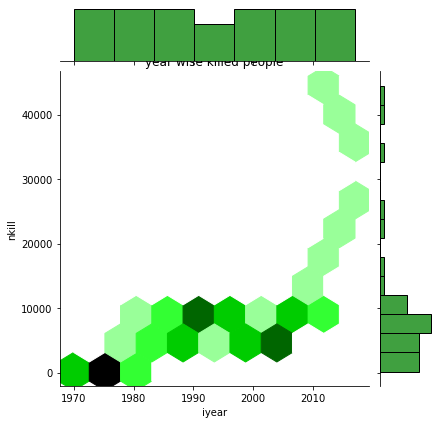

In [54]:
sns.jointplot(x='iyear',y='nkill',data=region_wise_kill, kind='hex',color='green')
plt.title("year wise killed people")

Text(0, 0.5, 'nwounded')

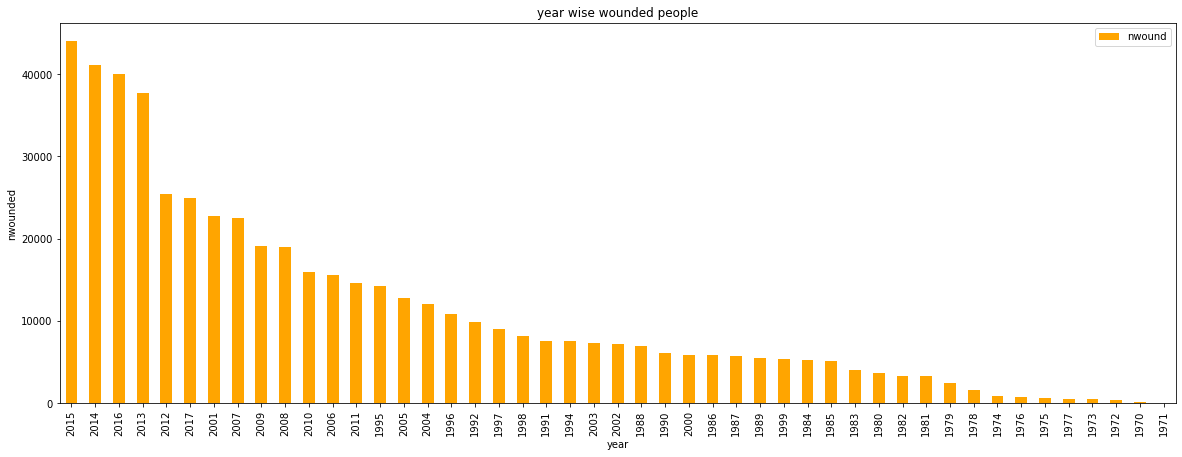

In [55]:
region_wise_year.plot(kind='bar',color="orange",figsize=(20,7))
plt.title("year wise wounded people")
plt.xlabel("year")
plt.ylabel("nwounded")

From the above data we can conclude that most number of people killed in 2014 its number was 44490
and most number of people wounded in 2015 its number was 44043


In [56]:

# finding and counting terrorist attacked cities
terrorist_attack.city.value_counts()

Unknown      9775
Baghdad      7589
Karachi      2652
Lima         2359
Mosul        2265
             ... 
Hotwag          1
Ostend          1
Balughata       1
Jikoyi          1
Kubentog        1
Name: city, Length: 36674, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


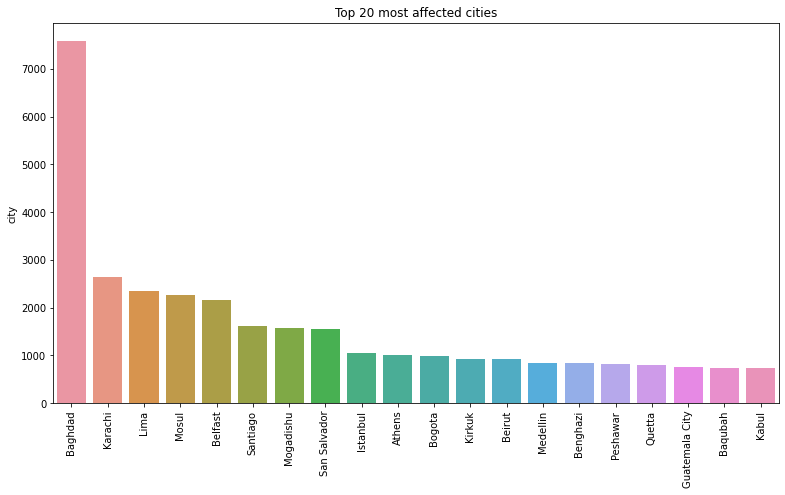

In [58]:

City=terrorist_attack.city.value_counts()
City=City[1:]
plt.figure(figsize=(13,7))
City=City.head(20)
sns.barplot(City.index,City).set_title('Top 20 most affected cities');
plt.xticks(rotation=90);

from the above data we can conclude that most effected city was Baghdad and 7589 number of times attacked

In [59]:
# finding terrist attacks in reginal areas

reginal_attack=terrorist_attack['region_txt'].value_counts()
reginal_attack

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

In [60]:
terrorist_attack['region_txt'].value_counts().reset_index().rename(columns={"index":"region name","region_txt":"number of attacks"})

,region name,number of attacks
0,Middle East & North Africa,50474
1,South Asia,44974
2,South America,18978
3,Sub-Saharan Africa,17550
4,Western Europe,16639
5,Southeast Asia,12485
6,Central America & Caribbean,10344
7,Eastern Europe,5144
8,North America,3456
9,East Asia,802


In [61]:

reginal_attack.idxmax()


'Middle East & North Africa'

In [62]:

reginal_attack.max()


50474

In [63]:
reginal_attack.idxmin()

'Australasia & Oceania'

In [64]:

reginal_attack.min()

282

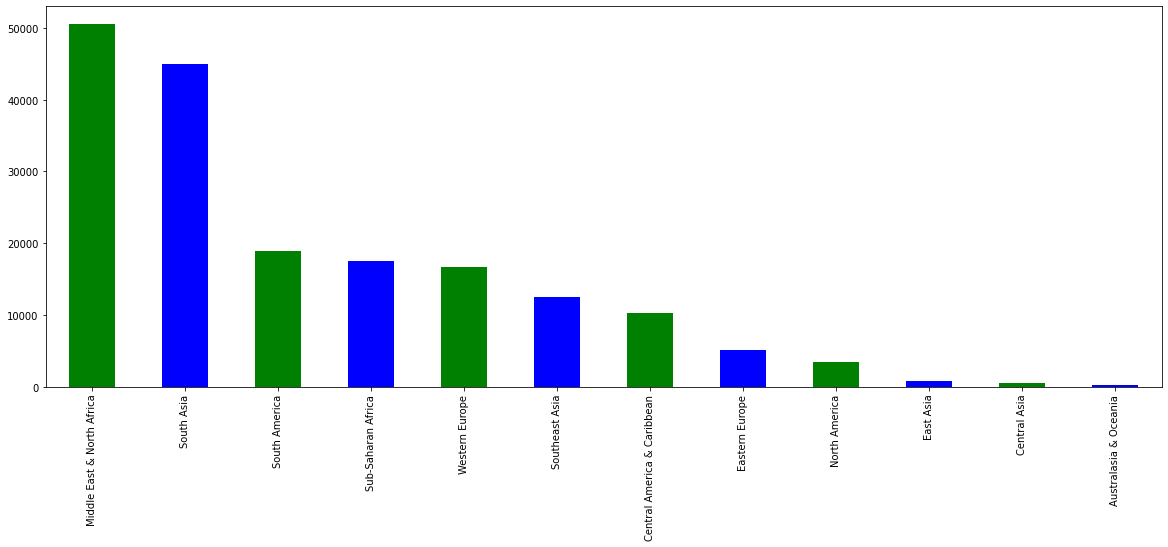

In [65]:

plt.figure(figsize=(20,7))
reginal_attack.plot(kind="bar",color={"blue","green"})


from the above data we can conclude that most terrorist attacked reginal area was Middle East &
North Africa and its number attacks was 50474,, and lowest terrist attacked reginal area was
Australasia & Oceania and its number of attacks was 282

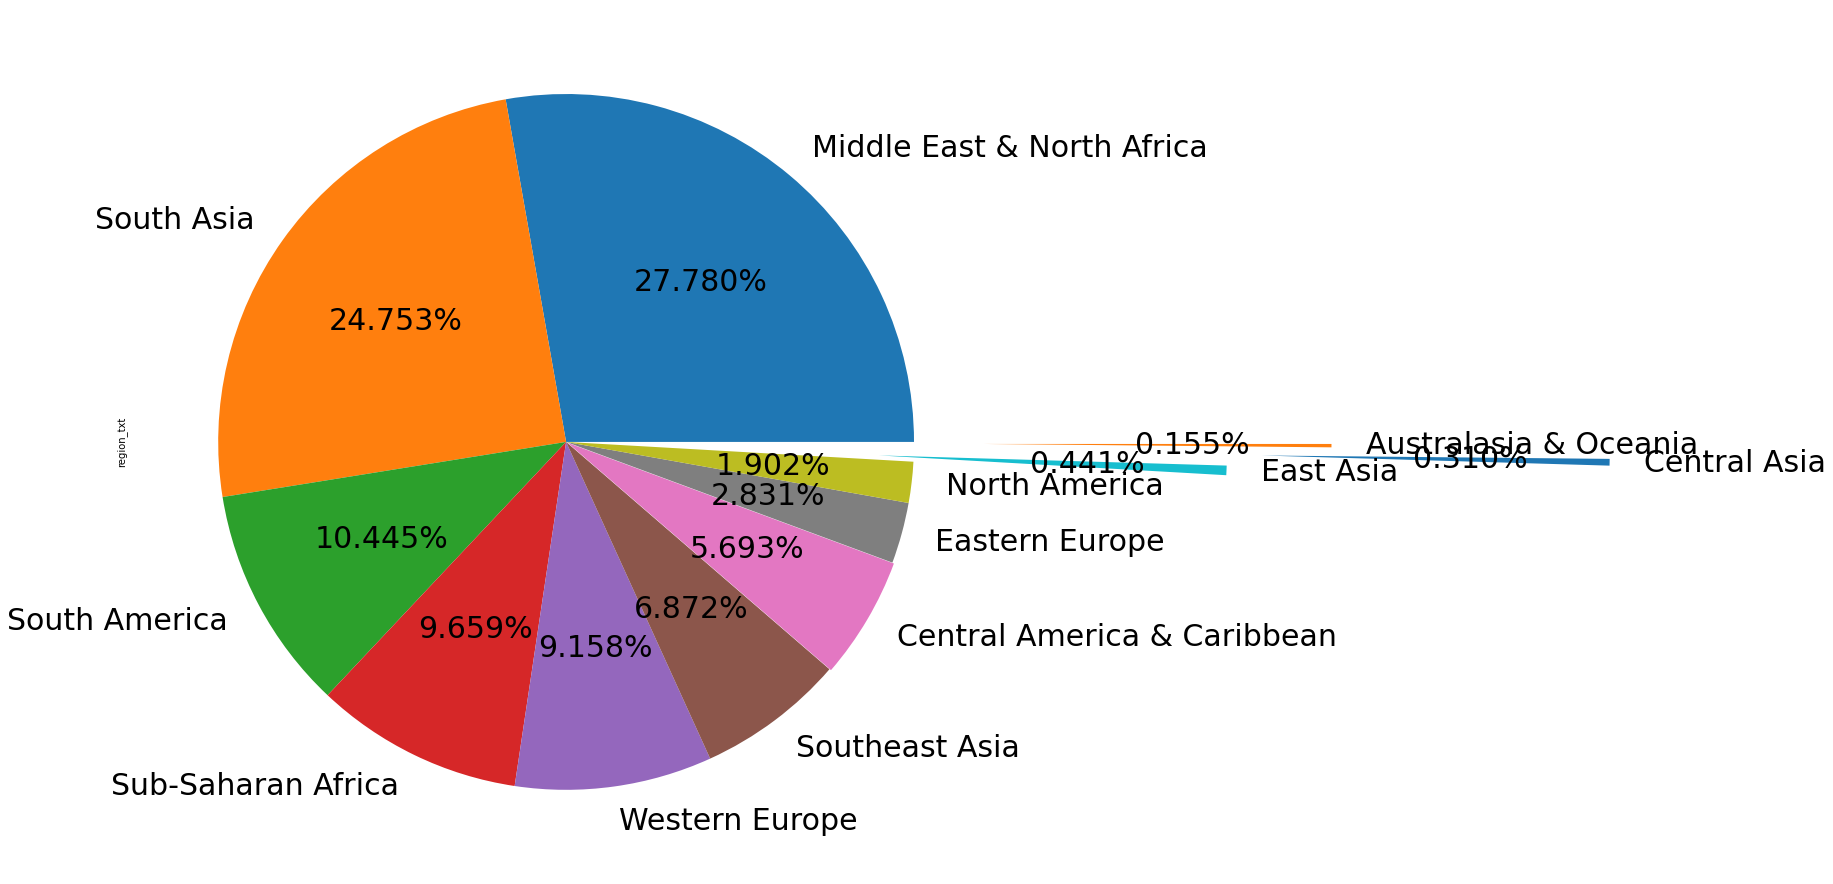

In [66]:
plt.figure(figsize=(20,16))
explode=[0.0,0.0,0.0,0.0,0.0,0.0,0.005,0.0,0.0,0.90,2.0,1.2]
terrorist_attack['region_txt'].value_counts().plot(kind='pie',autopct='%1.3f%%',explode=explode,textprops={'fontsize':30})

from the given data we conclude that most terrorsit attacked reginal area was "Middle East & North
Africa" its percentage 27.780% when compared to all other reginal area and least terrorist attacked
reginal area was Australasia & Oceania its percentage was 0.155%


In [67]:
# finding most frequent type of terrorist attacks
type_of_attacks=terrorist_attack['attacktype1_txt'].value_counts()
type_of_attacks

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [68]:

terrorist_attack['attacktype1_txt'].value_counts().reset_index().rename(columns={'index':"type_of_attacks","attacktype1_txt":'no.of.attacks'})


,type_of_attacks,no.of.attacks
0,Bombing/Explosion,88255
1,Armed Assault,42669
2,Assassination,19312
3,Hostage Taking (Kidnapping),11158
4,Facility/Infrastructure Attack,10356
5,Unknown,7276
6,Unarmed Assault,1015
7,Hostage Taking (Barricade Incident),991
8,Hijacking,659


In [69]:

type_of_attacks.idxmax()


'Bombing/Explosion'

In [70]:

type_of_attacks.max()


88255

In [71]:

type_of_attacks.idxmin()

'Hijacking'

In [72]:

type_of_attacks.min()


659

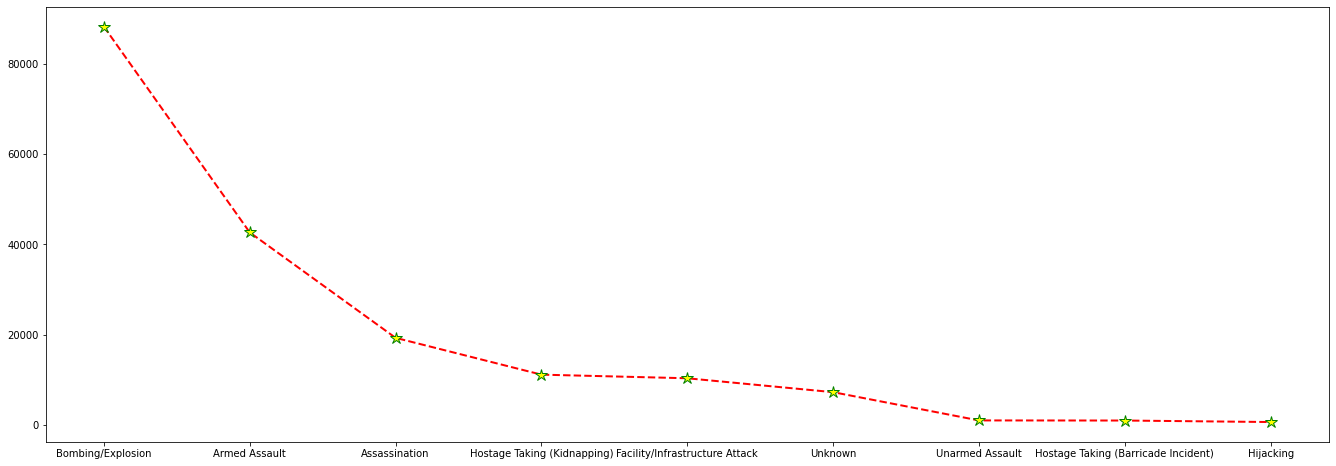

In [73]:

plt.figure(figsize=(23,8))
type_of_attacks.plot(kind="line",color='red',ls='--',linewidth=2.00,marker='*',markersize=12,markeredgecolor='green',markerfacecolor='yellow')


from the above data we can conclude that most number of attacks from 1970 to 2017 was
"Bombing/Explosion"
, this type of attack 88255 times used 


Least type of attack was "Hijacking"
,it was used only 659 times


In [74]:

# finding terrorist target and most frequent target type
target_type=terrorist_data[["targtype1_txt"]]
target_type.value_counts()


targtype1_txt                 
Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
dtype: int64

In [75]:

target_type.value_counts().reset_index()


,targtype1_txt,0
0,Private Citizens & Property,43511
1,Military,27984
2,Police,24506
3,Government (General),21283
4,Business,20669
5,Transportation,6799
6,Utilities,6023
7,Unknown,5898
8,Religious Figures/Institutions,4440
9,Educational Institution,4322


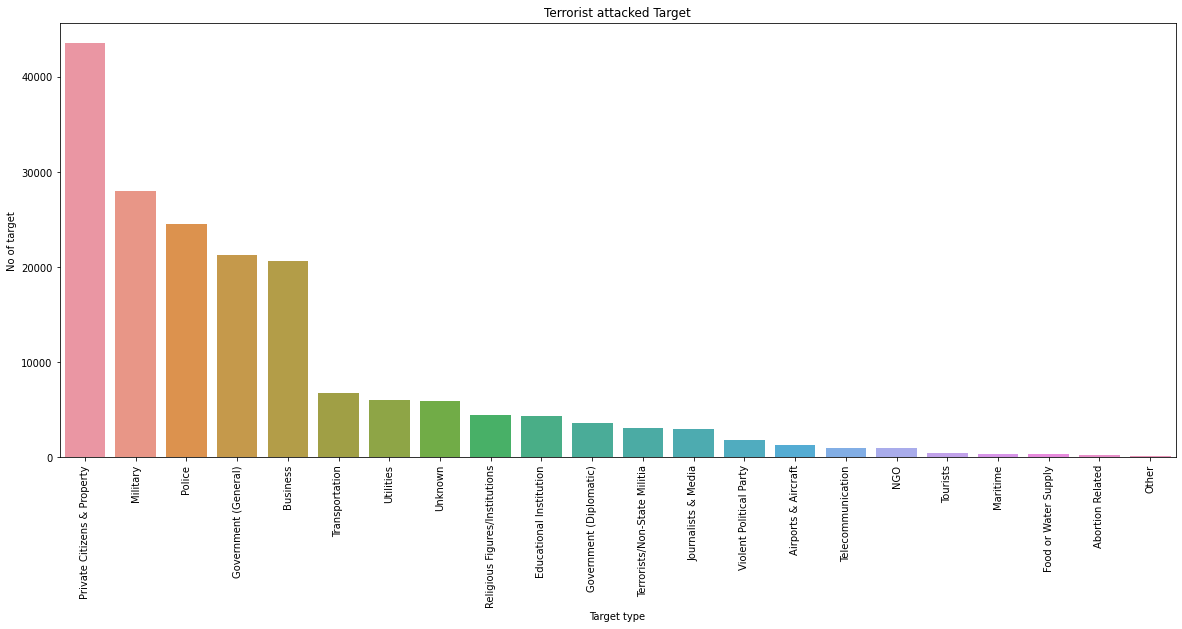

In [76]:

plt.figure(figsize=(20,8))
sns.countplot(x=target_type.targtype1_txt, data=target_type, order=pd.value_counts(terrorist_attack["targtype1_txt"]).index)
plt.xticks(rotation=90)
plt.title("Terrorist attacked Target")
plt.xlabel("Target type")
plt.ylabel("No of target")
plt.show()

from the above data we can conclude that main target was "Private Citizens & Property"
, its number of
attacks 43511 times


In [77]:

# finding most frequent used weapons
weapon_type=terrorist_attack['weaptype1_txt']
weapon_type.value_counts()


Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

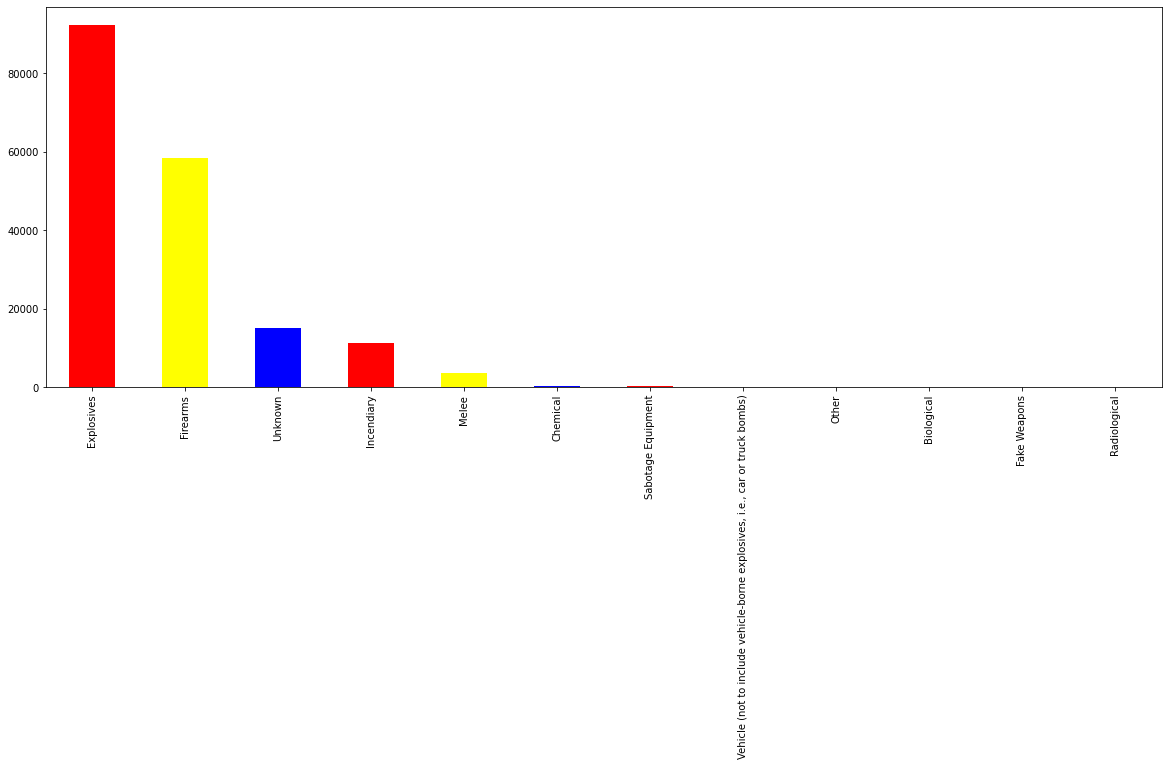

In [78]:

plt.figure(figsize=(20,7))
weapon_type.value_counts().plot(kind='bar',color={'red','yellow','blue'})


from the above data we can conclude that terrorists were mostly used weapon "Explosives"
, this was
92426 times used and rarely used weapon was "Radiological"
, it was used only 14 times


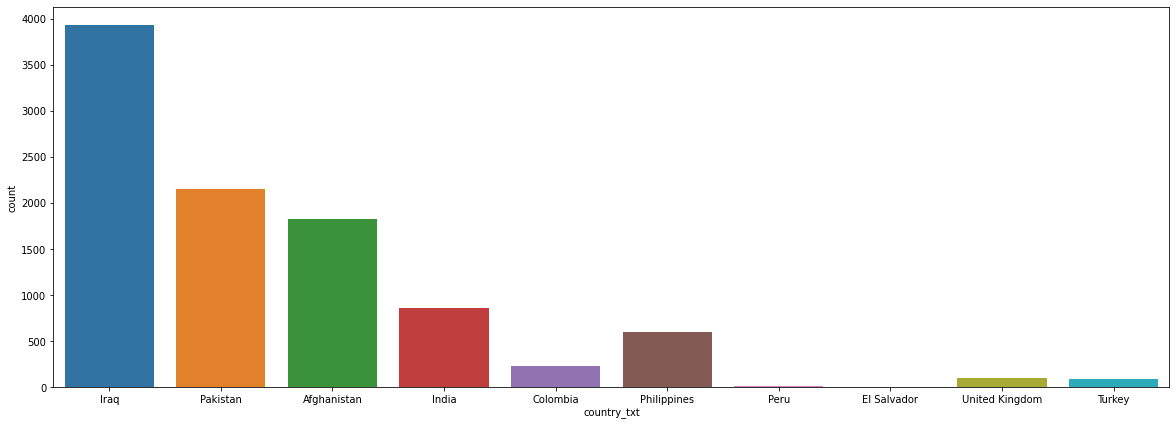

In [80]:
#finding 2014 terrorist attacked data
plt.figure(figsize=(20,7))
year=terrorist_attack[terrorist_attack["iyear"]== 2014]
sns.countplot(x=year.country_txt, order=pd.value_counts(terrorist_attack["country_txt"]).iloc[:10].index)


In [81]:

# finding in 2014 most terrorist attacked countries
year.country_txt.value_counts()


Iraq            3933
Pakistan        2151
Afghanistan     1824
Ukraine          895
Somalia          872
                ... 
Turkmenistan       1
Zimbabwe           1
Madagascar         1
Ivory Coast        1
Jamaica            1
Name: country_txt, Length: 100, dtype: int64

From the above data we can conclude that most terrorist attacked year was 2014, in this year the
number of attacks was 3933 in "iraq" country


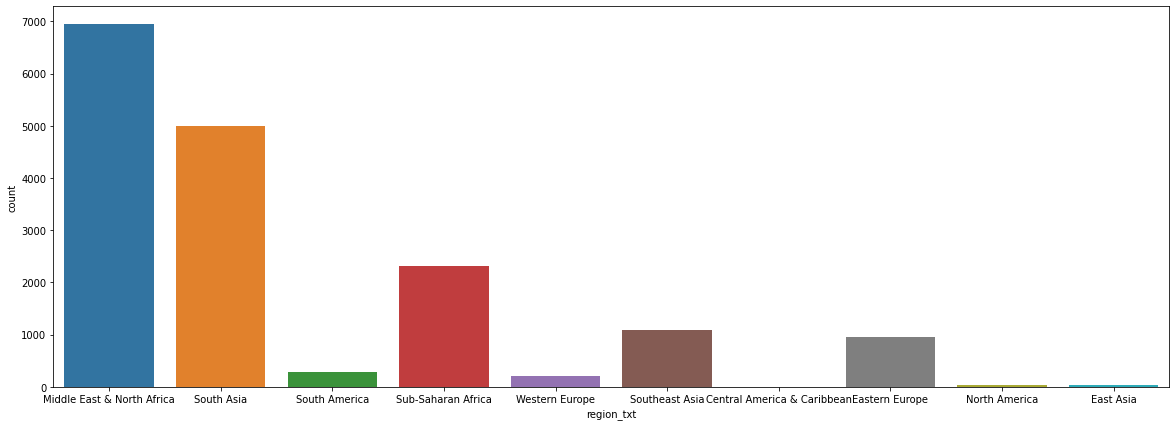

In [83]:
plt.figure(figsize=(20,7))
year=terrorist_attack[terrorist_attack["iyear"]== 2014]
sns.countplot(x=year.region_txt ,order=pd.value_counts(terrorist_attack["region_txt"]).iloc[:10].index)

In [84]:

year.region_txt.value_counts()


Middle East & North Africa     6939
South Asia                     4998
Sub-Saharan Africa             2321
Southeast Asia                 1082
Eastern Europe                  962
South America                   283
Western Europe                  215
East Asia                        43
North America                    37
Australasia & Oceania             9
Central Asia                      9
Central America & Caribbean       5
Name: region_txt, dtype: int64

from the above data we can conclude that most terrorist attacked year was 2014, in this year the
number of attacks was 6939 in "middle east &north africa" region

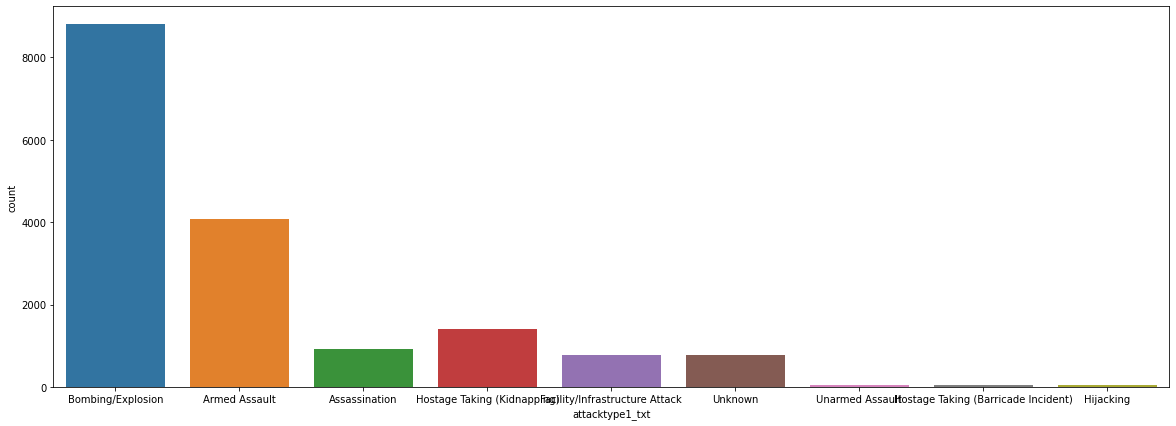

In [86]:

plt.figure(figsize=(20,7))
year=terrorist_attack[terrorist_attack["iyear"]== 2014]
sns.countplot(x=year.attacktype1_txt, order=pd.value_counts(terrorist_attack["attacktype1_txt"]).iloc[:10].index)


In [87]:

year.attacktype1_txt.value_counts()


Bombing/Explosion                      8799
Armed Assault                          4071
Hostage Taking (Kidnapping)            1397
Assassination                           920
Unknown                                 784
Facility/Infrastructure Attack          783
Unarmed Assault                          54
Hijacking                                49
Hostage Taking (Barricade Incident)      46
Name: attacktype1_txt, dtype: int64

from the above data we can conclude that most terrorist attacked year was 2014, in this year the
number of most frequent type of attacks was "Bombing/Explosion"
,this mode used 8799 times


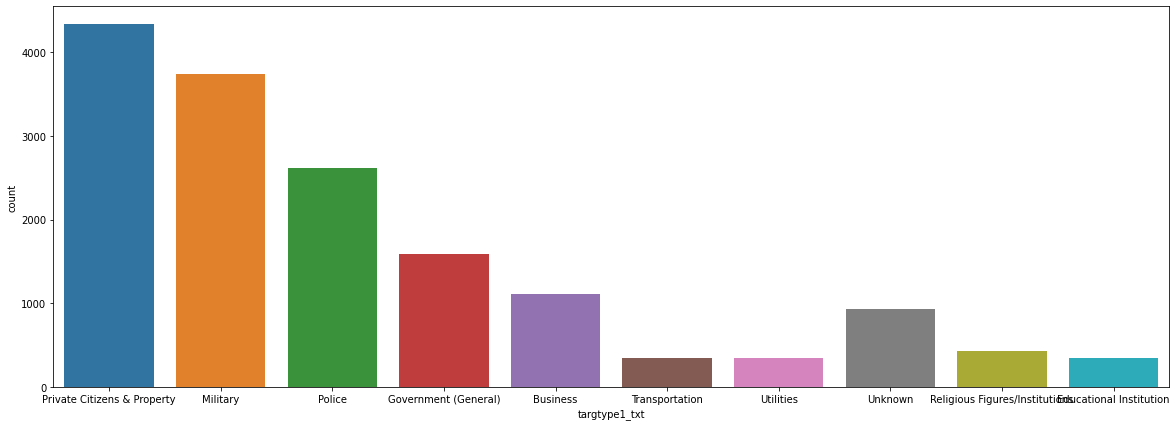

In [88]:

plt.figure(figsize=(20,7))
year=terrorist_attack[terrorist_attack["iyear"]== 2014]
sns.countplot(x=year.targtype1_txt, order=pd.value_counts(terrorist_attack["targtype1_txt"]).iloc[:10].index)

In [89]:

year.targtype1_txt.value_counts()


Private Citizens & Property       4331
Military                          3736
Police                            2615
Government (General)              1584
Business                          1107
Unknown                            928
Religious Figures/Institutions     429
Terrorists/Non-State Militia       364
Transportation                     347
Educational Institution            346
Utilities                          340
Journalists & Media                231
Government (Diplomatic)            159
Violent Political Party            138
NGO                                 82
Airports & Aircraft                 60
Telecommunication                   48
Food or Water Supply                21
Other                               18
Maritime                            13
Tourists                             6
Name: targtype1_txt, dtype: int64

from the above data we can conclude that most terrorist attacked year was 2014, in this year the
number of most frequent target type was "Private Citizens & Property"
,its number was 4331 times
targeted

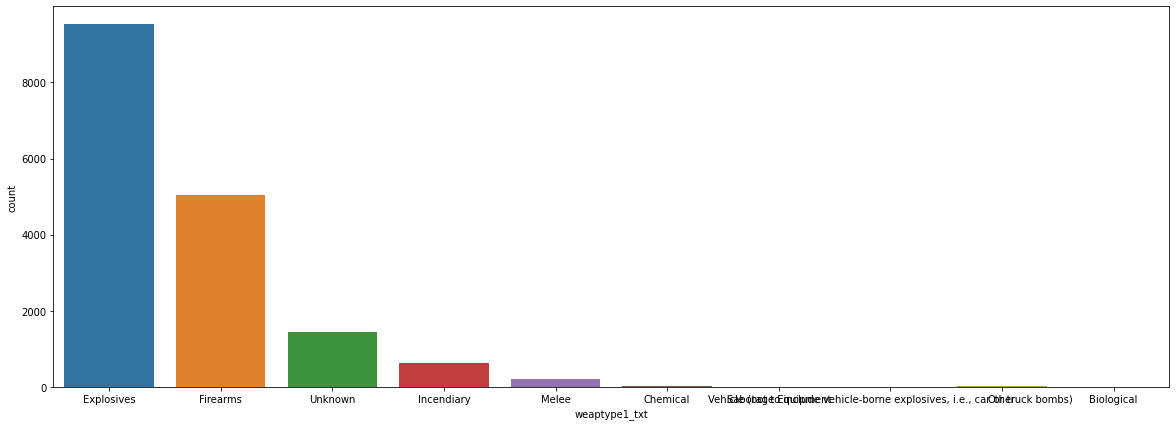

In [90]:
plt.figure(figsize=(20,7))
year=terrorist_attack[terrorist_attack["iyear"]== 2014]
sns.countplot(x=year.weaptype1_txt, order=pd.value_counts(terrorist_attack["weaptype1_txt"]).iloc[:10].index)

In [91]:

year.weaptype1_txt.value_counts()

Explosives                                                                     9521
Firearms                                                                       5040
Unknown                                                                        1443
Incendiary                                                                      640
Melee                                                                           214
Chemical                                                                         18
Other                                                                            14
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      10
Fake Weapons                                                                      2
Sabotage Equipment                                                                1
Name: weaptype1_txt, dtype: int64

from the above data we can conclude that most terrorist attacked year was 2014, in this year the
number of most frequent weapon type was "Explosives"
,its number was 9521times this type wepapon
used



In [92]:
# finding terrorist effected country & region & attack type & target & weapon type in 2014
df=terrorist_attack[(terrorist_attack['country_txt']=='Iraq') & (terrorist_attack['iyear']==2014)]

In [93]:
df1=terrorist_attack[(terrorist_attack['region_txt']=='Middle East & North Africa') & (terrorist_attack['iyear']==2014)]

In [94]:

df2=terrorist_attack[(terrorist_attack['targtype1_txt']=='Private Citizens & Property') & (terrorist_attack['iyear']==2014)]

In [99]:
df4=terrorist_attack[(terrorist_attack['iyear']==2014) & (terrorist_attack['weaptype1_txt']=='Explosives') ]

In [100]:

df3=terrorist_attack[(terrorist_attack['attacktype1_txt']=='Bombing/Explosion') & (terrorist_attack['iyear']==2014)]

In [101]:
df.shape,df1.shape,df2.shape,df3.shape,df4.shape

((3933, 31), (6939, 31), (4331, 31), (8799, 31), (9521, 31))

In [102]:
terrorist_data_2014= pd.concat([df, df1,df2,df3,df4])
terrorist_data_2014

,iyear,imonth,iday,extended,country,country_txt,region,region_txt,vicinity,crit1,...,weaptype1_txt,property,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,city,nkill,nwound
125340,2014,1,1,0,95,Iraq,10,Middle East & North Africa,0,1,...,Explosives,-9,START Primary Collection,-9,-9,0,-9,Mosul,2.0,6.0
125341,2014,1,1,0,95,Iraq,10,Middle East & North Africa,0,1,...,Firearms,-9,START Primary Collection,-9,-9,0,-9,Yathrib,2.0,3.0
125342,2014,1,1,0,95,Iraq,10,Middle East & North Africa,0,1,...,Firearms,1,START Primary Collection,-9,-9,0,-9,Tarmiyah,4.0,12.0
125347,2014,1,1,0,95,Iraq,10,Middle East & North Africa,0,1,...,Firearms,1,START Primary Collection,0,1,0,1,Fallujah,0.0,0.0
125348,2014,1,1,0,95,Iraq,10,Middle East & North Africa,0,1,...,Firearms,1,START Primary Collection,0,1,0,1,Fallujah,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142228,2014,12,31,0,214,Ukraine,9,Eastern Europe,0,1,...,Explosives,1,START Primary Collection,-9,-9,0,-9,Mykolayiv,0.0,0.0
142229,2014,12,30,0,4,Afghanistan,6,South Asia,0,1,...,Explosives,1,START Primary Collection,-9,-9,0,-9,Ghaziabad district,2.0,1.0
142236,2014,12,31,0,6,Algeria,10,Middle East & North Africa,0,1,...,Explosives,0,START Primary Collection,-9,-9,0,-9,Algiers,0.0,0.0
143507,2014,12,27,0,4,Afghanistan,6,South Asia,0,1,...,Explosives,0,START Primary Collection,0,0,0,0,Saberi district,5.0,0.0


# **from the above data we can conclude that terrorist effected data in 2014**

Observations:


1. Year wise Attacks: (i). Most number of attacks :16903 in 2014 (ii). Least number of attacks: 471 in 1971
2. Region wise Attacks: (i). Most number of attacks: 50474 in Middle East & North Africa (percentage is 27.78%) (ii). Least number of attacks: 282 in Australasia & Oceania (percentage is 0.15%)
3. Country wise Attacks: (i). Most number of attacks: 24636 in “Iraq” (percentage is 24.7%) (ii). Least number of attacks: 4292 in “Turkey” (percentage is 4.3%)
4. city wise attacks: (i).most number of attacks: city was Baghdad and 7589 number of times attacked
5. No.of people killed: (i). most people killed from 1970 to 2017 in Middle East & North Africa its number was 1,37,642 (ii).most number of people killed in 2014 its number was 44490
6. No.of people wounded: (i). most people wounded from 1970 to 2017 in Middle East & North Africa its number was 214308 (ii). most number of people wounded in 2015 its number was 44043
7. Attack type wise attacks: (i). Most number of attacks :88255 by “Bombing /Explosion” (ii). Least number of attacks: 659 by “Hijacking “
8. Target type wise attacks: (i). Most number of attacks: 43511 over “Private Citizens & Property” (ii). Least number of attacks: 263 over “Abortion Related”
9. Weapons used in attacks: (i). Most number of weapons in attack: 92426 times Explosives are used (ii) Least number of weapons in attack: 14 times Radiological are used
10. 2014-year attack (Most number of attacks): (i). Country: number of attacks are 3933 in “Iraq” (ii). Region: number of attacks are 6939 in “Middle East & North Africa” (iii). Type of attack: 8799 by Bombing /Explosion are
used Mostly (iv) Target type: 4331 over Private Citizens & Property (v) weapon type: 9521 Explosives are used